In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')  
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby('Дата')['Количество'].sum()

Вывести несколько первых строк сгруппированных данных

In [7]:
print(grouped_df.head())

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64


In [8]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Нарисуйте график продаж у `grouped_df`

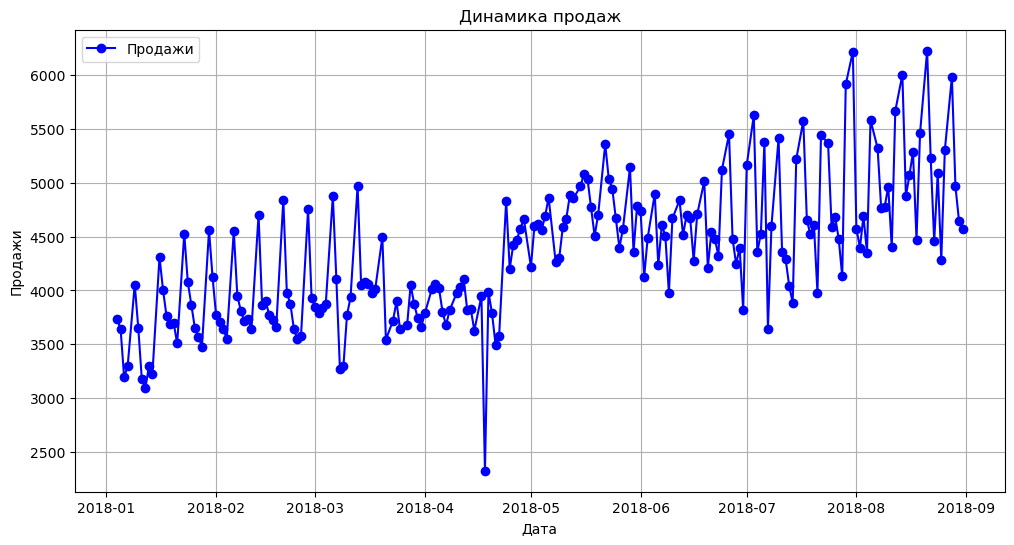

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df, linestyle='-', marker='o',color='b',label='Продажи')
plt.title('Динамика продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid()
plt.legend()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [11]:
#Как мы видим на графике, динамика продаж по датам демонстрирует общий рост с течением времени. Несмотря на краткосрочные колебания,
#к сентябрю 2018 года продажи достигают наибольших значений. На протяжении всего периода наблюдаются выраженные волнообразные колебания: рост сменяется
#падениями, что может указывать на сезонный характер спроса или другие внешние факторы.
#На графике можно выделить несколько резких спадов и подъёмов:
#Провалы: Эти спады присутствуют на протяжении всего периода, но наиболее заметны в начале года. Это, вероятно, связано с низким покупательским 
#спросом в межсезонье, когда потребители менее активны, что ведет к снижению объёма продаж.
#Подъёмы: С июля 2018 года отмечаются частые всплески продаж, что может быть связано с несколькими факторами:  - Началом сезонного спроса, например,
#на летние товары или подготовкой к осеннему сезону.
#Увеличением объёма заказов в результате проведения акций или сезонных скидок.
#В начале года (январь–март) продажи находятся на относительно низком уровне, но постепенно начинают увеличиваться. Особенно заметно снижение значений в
#январе, когда продажи опускаются ниже 3500 единиц. 
#В среднем периоде (март–июнь) продажи стабилизируются в пределах 4000–5000 единиц, хотя периодически фиксируются как всплески, так и кратковременные 
#падения. 
#В конце периода (июль–сентябрь) наблюдается устойчивый рост, особенно в летние месяцы, когда продажи достигают значений около 6000 единиц,
#что указывает на положительную динамику в конце года. 
#Таким образом, на графике явно прослеживается сезонность и влияние различных факторов, что, вероятно, связано с маркетинговыми кампаниями или
#изменениями в потребительских предпочтениях.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [12]:
Q1 = np.percentile(df['Количество'], 25)
Q3 = np.percentile(df['Количество'], 75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

max_outlier = df[df['Количество'] > upper_bound]['Количество'].max()

outlier_row = df[df['Количество'] == max_outlier]

print("Строка с максимальным выбросом по количеству продаж:")
print(outlier_row)

Строка с максимальным выбросом по количеству продаж:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [13]:
df_filtered = df[
    (df['Дата'].dt.weekday == 2) & 
    (df['Дата'].dt.month.isin([6, 7, 8])) & 
    (df['Склад'].isin([1, 2, 3])) 
]

top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()


print("\nТоповый товар по продажам по средам за июнь, июль, август у 3 склада:")
print(top_product)


Топовый товар по продажам по средам за июнь, июль, август у 3 склада:
product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [14]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [15]:
df_weather = pd.read_excel('weather.xls', sheet_name='Архив Погоды rp5')
print(df.head())


        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


In [16]:
df_weather['Дата'] = pd.to_datetime(df_weather['Дата'], format='%Y-%m-%d', errors='coerce')


In [17]:
df_weather_daily = df_weather.groupby('Дата', as_index=False)['T'].mean()
result = pd.merge(grouped_df, df_weather_daily, on='Дата', how='left')
print(result.head())


        Дата  Количество        T
0 2018-01-04        3734 -13.0875
1 2018-01-05        3643 -17.2500
2 2018-01-06        3193 -14.1250
3 2018-01-07        3298 -12.3375
4 2018-01-09        4055  -7.3875


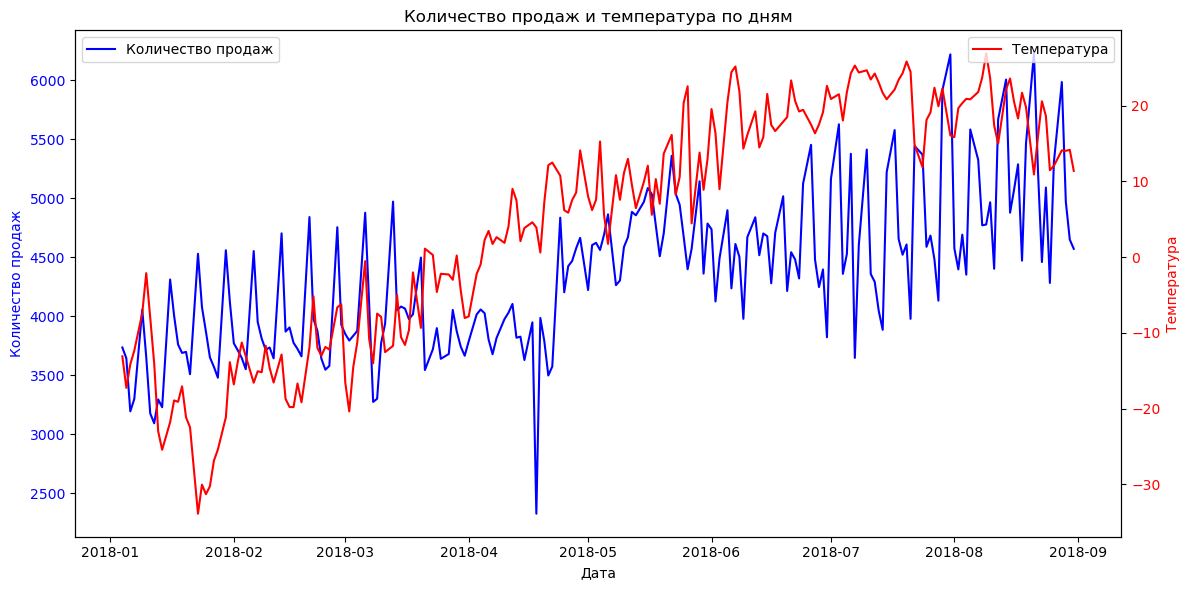

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(result['Дата'], result['Количество'], color='blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(result['Дата'], result['T'], color='red', label='Температура')
ax2.set_ylabel('Температура', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
plt.title('Количество продаж и температура по дням')
plt.xticks(rotation=45)
fig.tight_layout() 
plt.show()